LIBRARY YANG DIBUTUHKAN

In [1]:
# Mengimpor library pandas untuk manipulasi data dalam bentuk tabel (DataFrame)
import pandas as pd  
# - `import pandas`: Mengimpor pustaka pandas untuk analisis dan manipulasi data dalam format tabel (DataFrame).
# - `as pd`: Memberikan alias `pd` agar fungsi pandas lebih mudah digunakan.

# Mengimpor modul re untuk memproses pola teks menggunakan ekspresi reguler
import re  
# - `import re`: Mengimpor modul untuk menangani pola teks dengan regular expression, seperti pencarian atau penghapusan pola tertentu.

# Mengimpor modul string untuk koleksi karakter standar seperti alfabet dan tanda baca
import string  
# - `import string`: Mengimpor pustaka string yang menyediakan koleksi karakter standar seperti huruf alfabet dan tanda baca.

# Mengimpor pustaka NLTK (Natural Language Toolkit) untuk pengolahan bahasa alami
import nltk  
# - `import nltk`: Mengimpor pustaka NLTK yang digunakan untuk pemrosesan teks, seperti tokenisasi, stemming, dan analisis sintaks.

# Mengimpor stopwords dari NLTK untuk mendapatkan daftar kata umum yang tidak penting
from nltk.corpus import stopwords  
# - `from nltk.corpus`: Mengimpor corpus atau kumpulan data bawaan NLTK.
# - `import stopwords`: Mengimpor daftar kata umum seperti "dan," "yang," atau "di," yang sering diabaikan dalam analisis teks.

# Mengimpor kelas StemmerFactory dari pustaka Sastrawi untuk stemming kata dalam bahasa Indonesia
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  
# - `from Sastrawi.Stemmer.StemmerFactory`: Mengakses pustaka Sastrawi yang dirancang untuk stemming kata-kata bahasa Indonesia.
# - `import StemmerFactory`: Mengimpor kelas untuk membuat objek stemmer yang akan digunakan.

# Mengimpor pustaka googletrans untuk menerjemahkan teks secara otomatis
from googletrans import Translator  
# - `from googletrans`: Mengimpor pustaka Google Translate untuk pemrosesan terjemahan otomatis.
# - `import Translator`: Mengimpor kelas Translator untuk membuat objek penerjemah teks.

# Mengimpor kelas TextBlob dari pustaka textblob
from textblob import TextBlob  
# Penjelasan:
# - `from textblob`: Mengimpor pustaka untuk pemrosesan teks, seperti analisis sentimen, koreksi teks, dan ekstraksi frasa.
# - `import TextBlob`: Mengimpor kelas untuk membuat objek TextBlob, yang digunakan untuk memproses teks, termasuk analisis sentimen dan pengelompokan kata.

# Mengimpor matplotlib untuk membuat visualisasi seperti grafik dan diagram
import matplotlib.pyplot as plt  
# - `import matplotlib`: Mengimpor pustaka visualisasi data.
# - `as plt`: Memberikan alias `plt` agar mudah digunakan untuk membuat grafik.

# Mengimpor TfidfVectorizer dari sklearn untuk mengubah teks menjadi representasi numerik menggunakan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer  
# - `from sklearn.feature_extraction.text`: Modul untuk ekstraksi fitur teks.
# - `import TfidfVectorizer`: Mengimpor metode untuk mengonversi teks menjadi vektor berdasarkan frekuensi kata.

# Mengimpor train_test_split dari sklearn untuk membagi data menjadi data pelatihan dan pengujian
from sklearn.model_selection import train_test_split  
# - `from sklearn.model_selection`: Modul untuk membagi dataset.
# - `import train_test_split`: Metode untuk membagi data menjadi bagian pelatihan dan pengujian.

# Mengimpor SMOTE dari imblearn untuk menangani data tidak seimbang dengan oversampling
from imblearn.over_sampling import SMOTE  
# - `from imblearn.over_sampling`: Modul untuk menangani masalah ketidakseimbangan data.
# - `import SMOTE`: Teknik untuk membuat sampel sintetis guna menyeimbangkan distribusi kelas.

# Mengimpor algoritma Naive Bayes MultinomialNB dari sklearn untuk klasifikasi berbasis probabilitas
from sklearn.naive_bayes import MultinomialNB  
# - `from sklearn.naive_bayes`: Modul untuk algoritma Naive Bayes.
# - `import MultinomialNB`: Model untuk klasifikasi teks dengan menghitung probabilitas kata.

# Mengimpor fungsi evaluasi hasil klasifikasi dari sklearn
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  
# - `from sklearn.metrics`: Modul untuk evaluasi performa model.
# - `import classification_report`: Menghasilkan laporan performa model.
# - `import accuracy_score`: Menghitung akurasi model.
# - `import confusion_matrix`: Membuat matriks confusion untuk evaluasi klasifikasi.
# - `import ConfusionMatrixDisplay`: Menampilkan matriks kebingungan secara visual.

# Mengimpor model Support Vector Machine (SVM) dari sklearn untuk klasifikasi berbasis margin maksimal
from sklearn.svm import SVC  
# - `from sklearn.svm`: Modul untuk algoritma Support Vector Machine.
# - `import SVC`: Model untuk klasifikasi data berdasarkan margin maksimal antar kelas.

# Mengimpor kelas WordCloud dari pustaka wordcloud
from wordcloud import WordCloud  
# Penjelasan:
# - `from wordcloud`: Mengimpor pustaka untuk membuat visualisasi WordCloud.
# - `import WordCloud`: Mengimpor kelas untuk membuat objek WordCloud yang menghasilkan visualisasi kata berdasarkan frekuensi dalam teks.

SEMUA DATA YANG DIKUMPULKAN DARI HASIL CRAWLING

In [2]:
#Membaca file CSV bernama Data_Mentah.csv ke dalam DataFrame bernama df
df = pd.read_csv('Data_Tweet_Mentah.csv', encoding='utf-8',sep=';')

In [3]:
# Menampilkan informasi tentang DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      1112 non-null   object
 1   created_at               1112 non-null   object
 2   favorite_count           1112 non-null   int64 
 3   full_text                1112 non-null   object
 4   id_str                   1112 non-null   object
 5   image_url                29 non-null     object
 6   in_reply_to_screen_name  667 non-null    object
 7   lang                     1112 non-null   object
 8   location                 565 non-null    object
 9   quote_count              1112 non-null   int64 
 10  reply_count              1112 non-null   int64 
 11  retweet_count            1112 non-null   int64 
 12  tweet_url                1112 non-null   object
 13  user_id_str              1112 non-null   object
 14  username                 1112 non-null  

DATA CLEANING: MEMBERSIHKAN STRUKTUR DATA. HAPUS DUPLIKAT USERNAME SEHINGGA 1 PENGGUNA MEWAKILI 1 TWEET

In [4]:
# Menghapus data duplikat berdasarkan kolom 'username'
df_no_duplicates = df.drop_duplicates(subset=['username'])

In [5]:
# Menyimpan hasil penghapusan duplikat ke file baru
df_no_duplicates.to_csv('Data_Tweet_Nikah.csv', sep=';', encoding='utf-8', index=False)

In [6]:
# Menampilkan informasi tentang DataFrame hasil penghapusan duplikat
df_no_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1082 entries, 0 to 1111
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      1082 non-null   object
 1   created_at               1082 non-null   object
 2   favorite_count           1082 non-null   int64 
 3   full_text                1082 non-null   object
 4   id_str                   1082 non-null   object
 5   image_url                27 non-null     object
 6   in_reply_to_screen_name  650 non-null    object
 7   lang                     1082 non-null   object
 8   location                 547 non-null    object
 9   quote_count              1082 non-null   int64 
 10  reply_count              1082 non-null   int64 
 11  retweet_count            1082 non-null   int64 
 12  tweet_url                1082 non-null   object
 13  user_id_str              1082 non-null   object
 14  username                 1082 non-null   obje

MENGAMBIL KOLOM FULL TEXT UNTUK DIPROSES ANALISIS SENTIMEN

In [7]:
# Membuat DataFrame df_full_text independen
df_full_text = pd.DataFrame(df_no_duplicates[['full_text']])

In [8]:
# Menampilkan beberapa baris pertama dari kolom 'full_text' untuk verifikasi
print(df_full_text.head(4))

                                           full_text
0                         @CNNIndonesia ya bagus lah
1  @CNNIndonesia Di perkampungan atau di desa mas...
2  @CNNIndonesia Bekerja utk memenuhi hidup sendi...
3                 @CNNIndonesia Padahal malah bagus.


TEXT PREPROCESSING: MEMPERSIAPKAN TEKS YANG DIGUNAKAN UNTUK ANALISIS

CASE FOLDING YAITU MENGUBAH HURUF TWEET MENJADI HURUF KECIL AGAR KONSISTEN DAN TIDAK MENGGANGGU DALAM PROSES ANALISIS PEMROSESAN TEKS


In [9]:
# Fungsi case folding
def case_folding(text):
    return text.lower()  # Mengubah teks menjadi huruf kecil

In [10]:
# Menambahkan kolom hasil case folding pada df_full_text
df_full_text['full_text_casefolded'] = df_full_text['full_text'].apply(case_folding)

In [11]:
# Menampilkan beberapa baris pertama setelah case folding
print(df_full_text[['full_text', 'full_text_casefolded']].head(4))

                                           full_text  \
0                         @CNNIndonesia ya bagus lah   
1  @CNNIndonesia Di perkampungan atau di desa mas...   
2  @CNNIndonesia Bekerja utk memenuhi hidup sendi...   
3                 @CNNIndonesia Padahal malah bagus.   

                                full_text_casefolded  
0                         @cnnindonesia ya bagus lah  
1  @cnnindonesia di perkampungan atau di desa mas...  
2  @cnnindonesia bekerja utk memenuhi hidup sendi...  
3                 @cnnindonesia padahal malah bagus.  


CLEANING PEMBERSIHAN DOKUMEN MELIBATKAN PENGHAPUSAN ELEMEN YANG TIDAK DIPERLUKAN

In [12]:
# Fungsi cleaning
def clean_text(text):
    # Langkah 1: Hapus username, URL, tag HTML, dan karakter tunggal (misalnya "a", "b", dsb.)
    text = re.sub(r'@\w+|http[s]?://\S+|<.*?>|\b[a-zA-Z]\b', ' ', text)  
    # - `@\w+`: Menghapus semua username yang diawali dengan '@' diikuti oleh satu atau lebih karakter (misalnya @username).
    # - `http[s]?://\S+`: Menghapus URL yang dimulai dengan 'http://' atau 'https://' diikuti oleh satu atau lebih karakter (misalnya http://example.com).
    # - `<.*?>`: Menghapus tag HTML (misalnya <div>, <p>, dll.), dengan cara mencari semua yang ada di dalam tanda < >.
    # - `\b[a-zA-Z]\b`: Menghapus karakter tunggal (huruf alfabet) yang terpisah, seperti 'a', 'b', 'c', dll. (kata satu huruf).
    
    # Langkah 2: Menghilangkan tanda baca (misalnya koma, titik, tanda seru, dll.)
    text = text.translate(str.maketrans('', '', string.punctuation))  
    # - `string.punctuation` berisi semua karakter tanda baca standar seperti: `!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~`
    # - `str.maketrans('', '', string.punctuation)` akan membuat tabel terjemahan untuk menghapus tanda baca ini.
    # - `text.translate(...)` akan mengganti semua tanda baca yang ditemukan dalam teks dengan string kosong, artinya tanda baca dihapus.

    # Langkah 3: Hapus semua karakter selain huruf alfabet (a-zA-Z)
    text = re.sub(r'[^a-zA-Z]', ' ', text)  
    # Penjelasan:
    # - `[^a-zA-Z]` adalah pola reguler yang mencocokkan karakter yang **bukan** huruf alfabet (A-Z atau a-z).
    # - `re.sub(r'[^a-zA-Z]', ' ', text)` mengganti semua karakter non-huruf dengan spasi (' ').

    # Langkah 4: Hilangkan spasi berlebih (misalnya banyak spasi berturut-turut atau spasi di awal/akhir)
    text = ' '.join(text.split())  
    # Penjelasan:
    # - `text.split()` memecah teks berdasarkan spasi (atau karakter pemisah lainnya), dan mengabaikan spasi ekstra.
    # - `' '.join(...)` menggabungkan kata-kata kembali menjadi satu string dengan hanya satu spasi antar kata.
    # - Ini akan menghilangkan spasi berlebih di awal, akhir, atau antar kata.

    # Langkah 5: Kembalikan teks yang sudah dibersihkan
    return text

In [13]:
# Menambahkan kolom hasil cleaning langsung ke DataFrame
df_full_text['full_text_cleaned'] = df_full_text['full_text_casefolded'].apply(clean_text)

In [14]:
# Menampilkan beberapa baris pertama setelah proses cleaning
print(df_full_text[['full_text_casefolded', 'full_text_cleaned']].head(4))

                                full_text_casefolded  \
0                         @cnnindonesia ya bagus lah   
1  @cnnindonesia di perkampungan atau di desa mas...   
2  @cnnindonesia bekerja utk memenuhi hidup sendi...   
3                 @cnnindonesia padahal malah bagus.   

                                   full_text_cleaned  
0                                       ya bagus lah  
1  di perkampungan atau di desa masih tinggi angk...  
2  bekerja utk memenuhi hidup sendiri saja susah ...  
3                                padahal malah bagus  


NORMALISASI: MENGUBAH TEKS DALAM BENTUK STANDAR

In [15]:
# Membaca file CSV yang berisi kamus kata baku dan tidak baku
kamus_df = pd.read_csv("kamuskatabaku.csv", sep=';', encoding='utf-8')

In [16]:
# Membuat dictionary dari kolom 'tidak_baku' dan 'kata_baku'
# Fungsi zip digunakan untuk menggabungkan dua kolom tersebut, sehingga membentuk pasangan (pair) dari kata tidak baku dan kata baku.
# Fungsi dict mengubah pasangan-pasangan yang dihasilkan oleh zip menjadi dictionary. Setiap kata tidak baku akan menjadi key, dan kata baku akan menjadi value.
normalization_dict = dict(zip(kamus_df['tidak_baku'], kamus_df['kata_baku']))

In [17]:
# Fungsi untuk normalisasi teks
def normalize_text(text):
    # Membagi teks menjadi kata-kata menggunakan spasi sebagai pemisah
    # Kemudian untuk setiap kata, kita akan mengecek apakah kata tersebut ada dalam kamus 'normalization_dict'
    # Menggabungkan kembali kata-kata yang sudah dinormalisasi dengan spasi di antara kata-kata
    return ' '.join(normalization_dict.get(word, word) for word in text.split())

In [18]:
# Menambahkan kolom hasil normalisasi langsung ke DataFrame
df_full_text['full_text_normalized'] = df_full_text['full_text_cleaned'].apply(normalize_text)

In [19]:
# Menampilkan beberapa baris pertama setelah proses normalisasi
print(df_full_text[['full_text_cleaned', 'full_text_normalized']].head(4))

                                   full_text_cleaned  \
0                                       ya bagus lah   
1  di perkampungan atau di desa masih tinggi angk...   
2  bekerja utk memenuhi hidup sendiri saja susah ...   
3                                padahal malah bagus   

                                full_text_normalized  
0                                       ya bagus lah  
1  di perkampungan atau di desa masih tinggi angk...  
2  bekerja untuk memenuhi hidup sendiri saja susa...  
3                                padahal malah bagus  


TOKENISASI: MEMECAH TEKS MENJADI UNIT KECIL (KATA)

In [20]:
# Fungsi tokenisasi
def tokenize_text(text):
    # Memecah teks menjadi daftar kata berdasarkan spasi
    return text.split()

In [21]:
# Menambahkan kolom hasil tokenisasi
df_full_text['full_text_tokenized'] = df_full_text['full_text_normalized'].apply(tokenize_text)

In [22]:
# Verifikasi hasil tokenisasi
print(df_full_text[['full_text_normalized', 'full_text_tokenized']].head(4))

                                full_text_normalized  \
0                                       ya bagus lah   
1  di perkampungan atau di desa masih tinggi angk...   
2  bekerja untuk memenuhi hidup sendiri saja susa...   
3                                padahal malah bagus   

                                 full_text_tokenized  
0                                   [ya, bagus, lah]  
1  [di, perkampungan, atau, di, desa, masih, ting...  
2  [bekerja, untuk, memenuhi, hidup, sendiri, saj...  
3                            [padahal, malah, bagus]  


REMOVE: MENGHAPUS KATA YANG TIDAK MEMILIKI INFORMASI PENTING

In [23]:
# Mengambil daftar stopwords untuk Bahasa Indonesia dari NLTK dan menyimpannya dalam bentuk set
stopwords_list = set(stopwords.words('indonesian'))

In [24]:
# Fungsi untuk menghapus stopwords
def remove_stopwords(tokens):
    # Memeriksa setiap token dalam daftar 'tokens'
    # Jika token tersebut bukan stopword (tidak ada dalam daftar 'stopwords_list')
    # maka token tersebut akan disimpan ke dalam daftar baru
    return [token for token in tokens if token.lower() not in stopwords_list]

In [25]:
# Menambahkan kolom hasil penghapusan stopwords
df_full_text['full_text_no_stopwords'] = df_full_text['full_text_tokenized'].apply(remove_stopwords)

In [26]:
# Verifikasi hasil penghapusan stopwords
print(df_full_text[['full_text_tokenized', 'full_text_no_stopwords']].head(4))

                                 full_text_tokenized  \
0                                   [ya, bagus, lah]   
1  [di, perkampungan, atau, di, desa, masih, ting...   
2  [bekerja, untuk, memenuhi, hidup, sendiri, saj...   
3                            [padahal, malah, bagus]   

                              full_text_no_stopwords  
0                                        [ya, bagus]  
1  [perkampungan, desa, angka, pernikahan, pernik...  
2          [memenuhi, hidup, susah, berumah, tangga]  
3                                            [bagus]  


STEMMING: MENGUBAH KATA KE BENTUK DASAR UNTUK MENGHINDARI VARIASI KATA

In [27]:
# Menginisialisasi objek factory dari kelas StemmerFactory yang ada dalam library Sastrawi.
# StemmerFactory adalah kelas yang digunakan untuk membuat objek stemmer yang dapat melakukan proses stemming pada kata-kata dalam Bahasa Indonesia.
factory = StemmerFactory()

# Membuat objek stemmer menggunakan metode create_stemmer()
# Dengan memanggil metode `create_stemmer()` dari objek factory yang telah diinisialisasi, mendapatkan objek stemmer yang siap digunakan.
# Objek stemmer ini yang akan digunakan untuk mengubah kata menjadi bentuk dasarnya.
stemmer = factory.create_stemmer()

In [28]:
# Fungsi ini menerima parameter `tokens` (list kata), dan mengubah setiap kata menjadi bentuk dasar menggunakan stemmer.
def stemming_text(tokens):
    # Hasil stemming setiap kata kemudian digabungkan menjadi sebuah string utuh yang dipisahkan dengan spasi.
    return ' '.join([stemmer.stem(word) for word in tokens])

In [29]:
# Menambahkan kolom hasil stemming
df_full_text['full_text_stemmed'] = df_full_text['full_text_no_stopwords'].apply(stemming_text)

In [30]:
# Verifikasi hasil stemming
print(df_full_text[['full_text_no_stopwords', 'full_text_stemmed']].head(4))

                              full_text_no_stopwords  \
0                                        [ya, bagus]   
1  [perkampungan, desa, angka, pernikahan, pernik...   
2          [memenuhi, hidup, susah, berumah, tangga]   
3                                            [bagus]   

                                   full_text_stemmed  
0                                           ya bagus  
1  kampung desa angka nikah nikah kota iya turun ...  
2                     penuh hidup susah rumah tangga  
3                                              bagus  


TRANSLATE KE BAHASA INGGRIS KARENA TEXTBLOB MENGGUNAKAN BAHASA INGGRIS

In [31]:
# Membuat objek Translator dari googletrans
# Objek ini digunakan untuk melakukan terjemahan teks
translator = Translator()

In [32]:
# Fungsi untuk menerjemahkan teks dari Bahasa Indonesia ke Bahasa Inggris
def translate_text(text):
    try:
        # Menerjemahkan teks menggunakan objek translator
        # 'src' menentukan bahasa sumber (id: Bahasa Indonesia), dan 'dest' menentukan bahasa tujuan (en: Bahasa Inggris)
        # Menggunakan metode translate() dari objek translator untuk menerjemahkan teks
        translated = translator.translate(text, src='id', dest='en')

        # Mengembalikan hasil teks yang telah diterjemahkan
        # Hasil terjemahan tersedia dalam properti 'text' dari objek 'translated'
        return translated.text
    except Exception as e:
        # Jika terjadi error saat menerjemahkan, misalnya masalah koneksi atau input yang tidak valid
        # Pesan error yang dihasilkan akan dicetak di konsol untuk membantu debugging
        print(f"Error saat menerjemahkan: {e}")

        # Mengembalikan teks asli jika terjadi error
        return text

In [33]:
# Menambahkan kolom hasil terjemahan ke DataFrame
df_full_text['full_text_translated'] = df_full_text['full_text_stemmed'].apply(translate_text)

In [34]:
# Menampilkan hasil terjemahan untuk beberapa baris pertama
print("Hasil Terjemahan:")
print(df_full_text[['full_text_stemmed', 'full_text_translated']].head(4))

Hasil Terjemahan:
                                   full_text_stemmed  \
0                                           ya bagus   
1  kampung desa angka nikah nikah kota iya turun ...   
2                     penuh hidup susah rumah tangga   
3                                              bagus   

                                full_text_translated  
0                                          Yes, good  
1  Villages, urban marriage rates, yes, marriage ...  
2                   full of difficult household life  
3                                               Good  


PELABELAN SENTIMEN (POSITIF, NEGATIF, NETRAL) MENGGUNAKAN TEXTBLOB

In [35]:
def classify_sentiment(text):
    # Analisis polaritas
    polarity = TextBlob(text).sentiment.polarity
    
    # Klasifikasi berdasarkan polaritas
    if polarity > 0:
        return 'Positif'
    elif polarity < 0:
        return 'Negatif'
    else:
        return 'Netral'

In [36]:
# Menambahkan kolom sentimen
df_full_text['sentiment'] = df_full_text['full_text_translated'].apply(classify_sentiment)

In [37]:
# Menampilkan contoh data
print(df_full_text[['full_text_translated', 'sentiment']].head(4))

                                full_text_translated sentiment
0                                          Yes, good   Positif
1  Villages, urban marriage rates, yes, marriage ...    Netral
2                   full of difficult household life   Negatif
3                                               Good   Positif


In [38]:
# Menghitung jumlah masing-masing kategori sentimen
# Fungsi value_counts() menghitung jumlah kemunculan masing-masing kategori
sentiment_counts = df_full_text['sentiment'].value_counts()

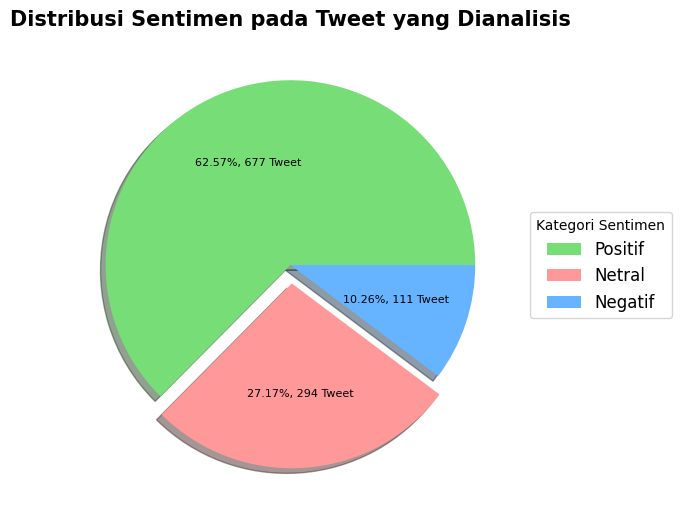

In [39]:
# Membuat label dan warna khusus
labels = ['Positif', 'Netral', 'Negatif']  # Label kategori
sizes = sentiment_counts.values  # Nilai frekuensi setiap kategori
colors = ['#77dd77', '#ff9999', '#66b3ff']  # Warna untuk kategori
explode = (0, 0.1, 0)  # Memberikan efek meledak pada irisan tertentu (Netral)

# Membuat plot dengan gaya khusus
fig, ax = plt.subplots(figsize=(10, 6))  # Ukuran figur
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=None,  # Tidak ada label di luar pie
    autopct=lambda p: f'{p:.2f}%, {p*sum(sizes)/100 :.0f} Tweet',  # Format persentase dan jumlah data
    explode=explode,
    shadow=True,
    colors=colors,
    startangle=0,  # Dimulai dari sudut 0
    textprops={'fontsize': 8}  # Ukuran font teks
)

# Menambahkan judul
ax.set_title(
    'Distribusi Sentimen pada Tweet yang Dianalisis', 
    color='black', 
    weight='bold', 
    fontsize=15
)

# Menambahkan legenda
ax.legend(
    wedges,  # Menautkan legenda ke irisan pie
    labels,  # Label untuk legenda
    title="Kategori Sentimen",  # Judul legenda
    loc="center left",  # Posisi legenda
    bbox_to_anchor=(1, 0.5),  # Menempatkan legenda di sebelah kanan pie chart
    fontsize=12  # Ukuran font legenda
)

# Menampilkan hasil
plt.show()

WORDCLOUD VISUALISASI KEMUNCULAN KATA

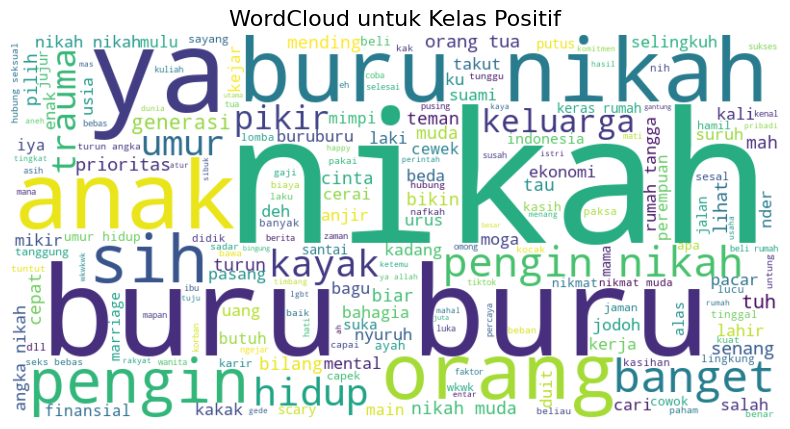

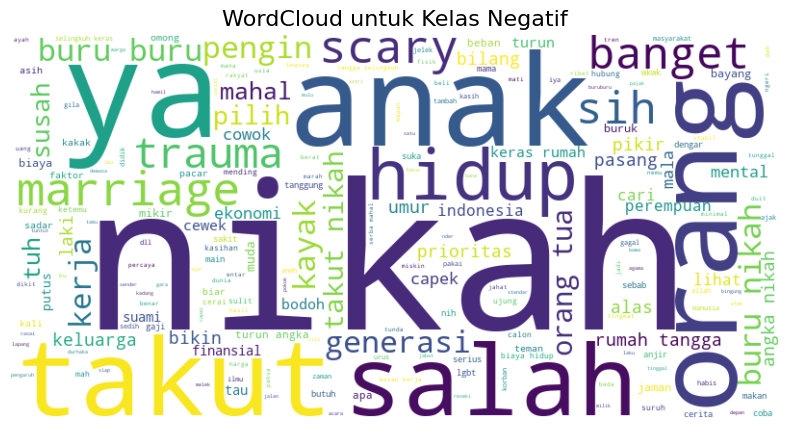

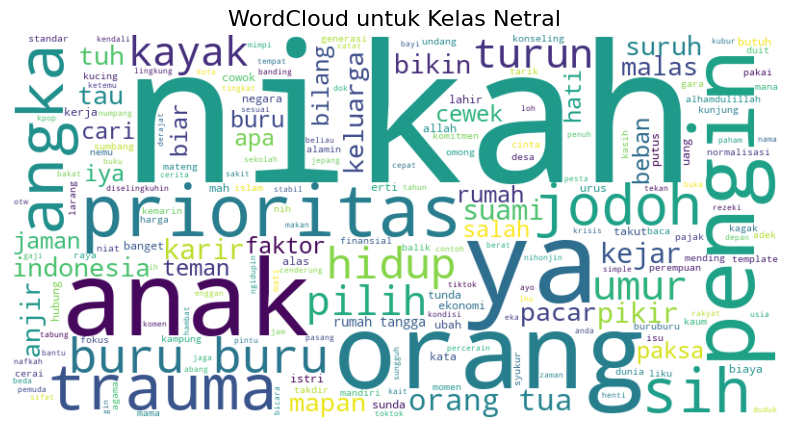

In [40]:
# Fungsi untuk menghasilkan WordCloud berdasarkan kelas
def generate_wordcloud(data, title):
    # Menggabungkan semua teks dalam kelas menjadi satu string
    text = " ".join(data)  # Menggabungkan seluruh teks menjadi satu string besar

    # Membuat WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Menampilkan WordCloud
    plt.figure(figsize=(10, 5))  # Ukuran gambar adalah 10x5 inci
    plt.imshow(wordcloud, interpolation='bilinear')  # Menampilkan WordCloud menggunakan interpolasi bilinear
    plt.title(title, fontsize=16)  # Menambahkan judul pada WordCloud sesuai kelas sentimen
    plt.axis('off')  # Menonaktifkan axis karena tidak diperlukan dalam WordCloud
    plt.show()  # Menampilkan gambar WordCloud di layar

# Mengelompokkan data berdasarkan kelas sentimen
for sentiment_class in ['Positif', 'Negatif', 'Netral']:
    # Memfilter data berdasarkan kelas sentimen
    class_data = df_full_text[df_full_text['sentiment'] == sentiment_class]['full_text_stemmed']
    
    # Membuat WordCloud untuk setiap kelas
    generate_wordcloud(class_data, f"WordCloud untuk Kelas {sentiment_class}")


TF-IDF: MEMBERIKAN BOBOT BERDASARKAN FREKUENSI KEMUNCULAN

In [41]:
# Membuat objek TfidfVectorizer dari sklearn
# Objek ini digunakan untuk menghitung nilai TF-IDF untuk teks yang diberikan.
vectorizer = TfidfVectorizer()

In [42]:
# Menyesuaikan TF-IDF dengan data translated
# '.fit_transform()' akan menghitung bobot kata-kata dan mengubah teks menjadi representasi numerik
tfidf_matrix = vectorizer.fit_transform(df_full_text['full_text_translated'])

In [43]:
# Mendapatkan fitur (kata-kata)
tfidf_features = vectorizer.get_feature_names_out()

In [44]:
# Mengubah ke DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_features)

In [45]:
# Menampilkan DataFrame TF-IDF
print(tfidf_df.head())

   abandoned  abandonment  abi  able  abortion  about  abroad  absolute  \
0        0.0          0.0  0.0   0.0       0.0    0.0     0.0       0.0   
1        0.0          0.0  0.0   0.0       0.0    0.0     0.0       0.0   
2        0.0          0.0  0.0   0.0       0.0    0.0     0.0       0.0   
3        0.0          0.0  0.0   0.0       0.0    0.0     0.0       0.0   
4        0.0          0.0  0.0   0.0       0.0    0.0     0.0       0.0   

   abstinence  abusive  ...  yesterday  you  young  younger  youngest  your  \
0         0.0      0.0  ...        0.0  0.0    0.0      0.0       0.0   0.0   
1         0.0      0.0  ...        0.0  0.0    0.0      0.0       0.0   0.0   
2         0.0      0.0  ...        0.0  0.0    0.0      0.0       0.0   0.0   
3         0.0      0.0  ...        0.0  0.0    0.0      0.0       0.0   0.0   
4         0.0      0.0  ...        0.0  0.0    0.0      0.0       0.0   0.0   

   yourself  youth  yuka  zena  
0       0.0    0.0   0.0   0.0  
1       

PEMBAGIAN DATA TRAINIG DAN TESTING UNTUK MENGHINDARI OVERVITTING DAN MENGUJI MODEL

In [46]:
# Fitur dan label
X = tfidf_matrix  # Menggunakan tfidf_matrix sebagai fitur input untuk model
y = df_full_text['sentiment']  # Kolom sentimen (label/output yang ingin diprediksi oleh model)

In [47]:
# Membagi data menjadi training dan testing
# test_size=0.2: 20% data digunakan untuk testing, 80% untuk training
# random_state=42: Mengontrol pengacakan untuk hasil yang konsisten
# stratify=y: Membagi data sehingga distribusi label di training dan testing sama
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [48]:
# Menampilkan distribusi label pada data training
print("Distribusi Label pada Data Training:")
print(y_train.value_counts())

Distribusi Label pada Data Training:
sentiment
Positif    541
Negatif    235
Netral      89
Name: count, dtype: int64


In [49]:
# Menampilkan distribusi label pada data testing
print("Distribusi Label pada Data Testing:")
print(y_test.value_counts())

Distribusi Label pada Data Testing:
sentiment
Positif    136
Negatif     59
Netral      22
Name: count, dtype: int64


SMOTE (SYNTHETIC MINORITY OVER SAMPLING TECHNIQUE) ADALAH METODE UNTUK MENGHASILKAN DATA SINTETIS UNTUK KELAS MINORITAS SEHINGGA DISTRIBUSI SEIMBANG

In [50]:
# Inisialisasi SMOTE untuk menangani ketidakseimbangan data
# random_state=42: Menentukan seed untuk memastikan hasil yang konsisten ketika kode dijalankan ulang.
smote = SMOTE(random_state=42)

In [51]:
# Melakukan oversampling pada data training
# smote.fit_resample() digunakan untuk menghasilkan data sintetis pada kelas minoritas.
# Data training (X_train) dan labelnya (y_train) diberikan sebagai input.
# SMOTE akan menghasilkan data sintetis untuk menyeimbangkan jumlah data di semua kelas.
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [52]:
# Menampilkan distribusi data setelah SMOTE
# pd.Series(y_train_balanced).value_counts() menghitung jumlah label untuk setiap kelas
print("Distribusi Label Setelah SMOTE:")
print(pd.Series(y_train_balanced).value_counts())

Distribusi Label Setelah SMOTE:
sentiment
Positif    541
Netral     541
Negatif    541
Name: count, dtype: int64


KLASIFIKASI NAIVE BAYES BERDASARKAN TEORI PROBABILITAS BAYES UNTUK MEMPREDIKSI SENTIMEN

In [53]:
# Inisialisasi model Naive Bayes
nb_model = MultinomialNB(alpha=1)  # Gunakan alpha untuk smoothing
# Penjelasan:
# - 'MultinomialNB' adalah algoritma Naive Bayes untuk data dengan distribusi multinomial, 
#   biasanya digunakan untuk klasifikasi teks.
# - 'alpha=1' adalah parameter smoothing Laplace (atau Lidstone), yang mencegah probabilitas menjadi nol
#   jika ada kata yang tidak muncul di data training. Nilai alpha dapat disesuaikan untuk performa optimal.

In [54]:
# Melatih model pada data training
nb_model.fit(X_train_balanced, y_train_balanced)
# Penjelasan:
# - 'fit()' digunakan untuk melatih model Naive Bayes menggunakan data training.
# - 'X_train_balanced': Data fitur dari data training yang sudah seimbang (setelah SMOTE).
# - 'y_train_balanced': Label kelas yang sesuai dengan data training setelah oversampling.

MultinomialNB(alpha=1)

In [55]:
# Melakukan prediksi pada data testing
y_pred_nb = nb_model.predict(X_test)
# Penjelasan:
# - 'predict()' digunakan untuk memprediksi label kelas berdasarkan data testing 'X_test'.
# - Hasil prediksi disimpan dalam 'y_pred_nb', yang merupakan label yang diprediksi oleh model untuk setiap sampel di 'X_test'.

In [56]:
# Menampilkan laporan klasifikasi
print("\nLaporan Klasifikasi Naive Bayes:")
print(classification_report(y_test, y_pred_nb))
# Penjelasan:
# - 'classification_report(y_test, y_pred_nb)' menghasilkan laporan evaluasi model,
#   termasuk metrik seperti precision, recall, f1-score, dan support untuk setiap kelas.
# - 'precision': Ketepatan prediksi model untuk setiap kelas.
# - 'recall': Kemampuan model mendeteksi semua sampel yang benar-benar ada pada setiap kelas.
# - 'f1-score': Harmonic mean dari precision dan recall.
# - 'support': Jumlah sampel sebenarnya untuk setiap kelas dalam data testing.


Laporan Klasifikasi Naive Bayes:
              precision    recall  f1-score   support

     Negatif       0.58      0.83      0.69        59
      Netral       0.53      0.45      0.49        22
     Positif       0.87      0.73      0.79       136

    accuracy                           0.73       217
   macro avg       0.66      0.67      0.66       217
weighted avg       0.76      0.73      0.73       217



CONFUSION MATRIKS NAIVE BAYES

In [57]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

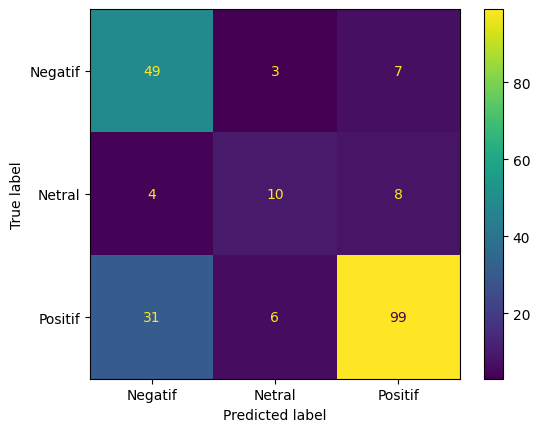

In [58]:
# Menampilkan confusion matrix dengan visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap='viridis')

KLASIFIKASI SVM DENGAN MENCARI HYPERLINE YANG MEMBAGI DATA KELAS

In [59]:
# Inisialisasi model SVM (Support Vector Machine) dengan kernel linear
svm_model = SVC(kernel='linear', C=1, random_state=42)
# Penjelasan:
# - 'SVC()' adalah konstruktor dari model Support Vector Machine untuk klasifikasi.
# - 'kernel='linear'': Menentukan jenis kernel yang digunakan. Di sini menggunakan kernel linear, yang berarti model akan mencari hyperplane linear yang memisahkan kelas-kelas dalam data.
# - 'C=1': Parameter regulasi yang mengontrol trade-off antara mendapatkan margin yang lebih besar dan menghindari kesalahan klasifikasi. Nilai C yang lebih besar memberikan penalti yang lebih besar untuk kesalahan.
# - 'random_state=42': Menetapkan nilai acak untuk memastikan hasil yang konsisten saat melakukan pengacakan atau pembagian data (misalnya, dalam pembagian data training dan testing).

In [60]:
# Melatih model dengan data training yang telah di-over-sampling menggunakan SMOTE
svm_model.fit(X_train_balanced, y_train_balanced)
# Penjelasan:
# - 'fit()' digunakan untuk melatih model dengan data training yang telah diberikan.
# - 'X_train_balanced': Fitur-fitur dari data training yang telah diseimbangkan menggunakan SMOTE.
# - 'y_train_balanced': Label yang sesuai dengan data training setelah diseimbangkan.

SVC(C=1, kernel='linear', random_state=42)

In [61]:
# Menggunakan model untuk melakukan prediksi pada data testing
y_pred_svm = svm_model.predict(X_test)
# Penjelasan:
# - 'predict()' digunakan untuk membuat prediksi berdasarkan data uji (X_test).
# - 'X_test': Fitur-fitur dari data testing.
# - 'y_pred_svm': Hasil prediksi yang dihasilkan oleh model untuk data testing.

In [63]:
# Menampilkan laporan klasifikasi untuk model SVM
# Laporan klasifikasi ini mencakup metrik seperti Precision, Recall, dan F1-Score untuk setiap kelas
print("\nLaporan Klasifikasi SVM:")
print(classification_report(y_test, y_pred_svm))
# Penjelasan:
# - 'classification_report()' menghasilkan laporan yang mencakup metrik evaluasi yang lebih detail untuk setiap kelas (misalnya, negatif, netral, positif):
#   - Precision: Persentase prediksi benar dari semua prediksi untuk kelas tersebut.
#   - Recall: Persentase prediksi benar dari semua data aktual untuk kelas tersebut.
#   - F1-Score: Harmonik rata-rata dari Precision dan Recall.
# - 'y_test': Label sebenarnya dari data testing.
# - 'y_pred_svm': Label prediksi yang dihasilkan oleh model SVM.


Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

     Negatif       0.73      0.78      0.75        59
      Netral       0.47      0.41      0.44        22
     Positif       0.87      0.86      0.86       136

    accuracy                           0.79       217
   macro avg       0.69      0.68      0.69       217
weighted avg       0.79      0.79      0.79       217



In [64]:
# Membuat confusion matrix untuk model SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

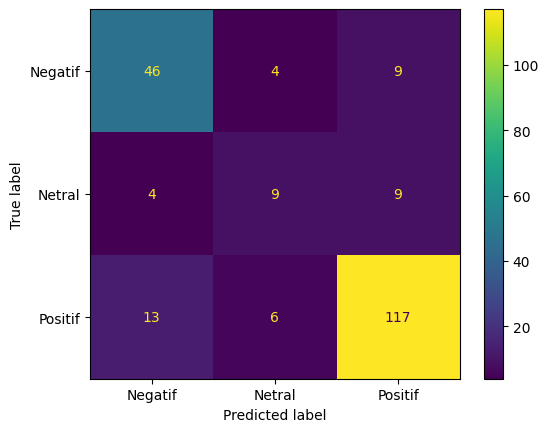

In [65]:
# Menampilkan confusion matrix dengan visualisasi
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=svm_model.classes_)
disp_svm.plot(cmap='viridis')

In [66]:
# Menyimpan hasil ke file CSV
df_full_text.to_csv('Data_Tweet_Hasil.csv', index=False)